In [1]:
import pandas as pd
import numpy as np
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier

In [2]:
iris=pd.read_csv("Iris_flower_dataset.csv")
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [3]:
iris.shape

(150, 6)

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
#Checking for null values
print(iris.isna().sum())
print(iris.describe())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [8]:
x= len(iris[iris['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",x)

No of Versicolor in Dataset: 50


In [9]:
y=len(iris[iris['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",y)

No of Virginica in Dataset: 50


In [10]:
n2 = len(iris[iris['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 50


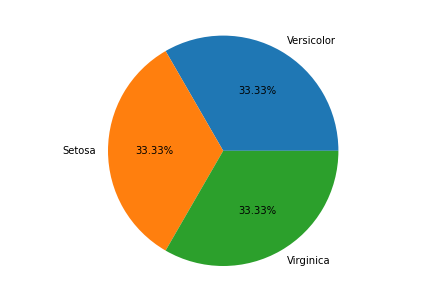

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%2.2f%%')
plt.show()

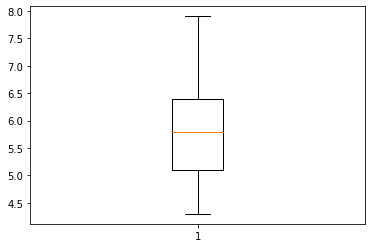

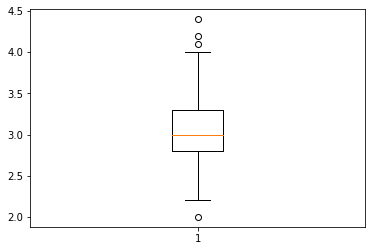

In [12]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([iris['SepalLengthCm']])
plt.figure(2)
plt.boxplot([iris['SepalWidthCm']])
plt.show()

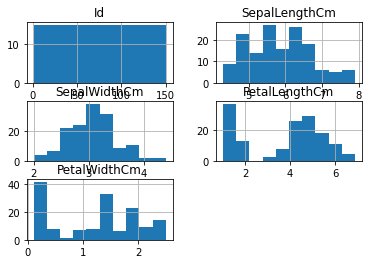

In [13]:
iris.hist()
plt.show()

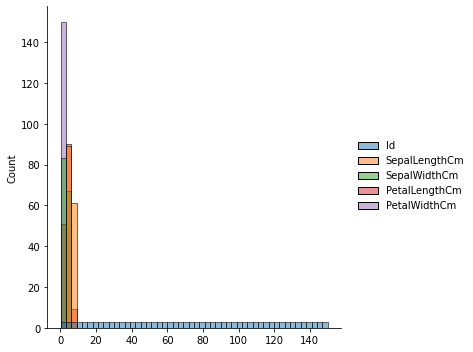

In [14]:
sns.displot(iris,bins=50)

Id                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
SepalLengthCm    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
SepalWidthCm      AxesSubplot(0.44569,0.536818;0.133621x0.343182)
PetalLengthCm    AxesSubplot(0.606034,0.536818;0.133621x0.343182)
PetalWidthCm     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
dtype: object

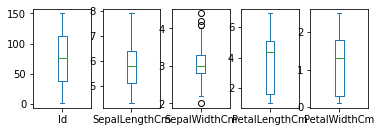

In [15]:
iris.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

In [16]:
X = iris['SepalLengthCm'].values.reshape(-1,1)
print(X)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [17]:
Y = iris['SepalWidthCm'].values.reshape(-1,1)
print(Y)

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.1]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]
 [3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]
 [2.8]
 [3.3]
 [2.4]
 [2.9]
 [2.7]
 [2. ]
 [3. ]
 [2.2]
 [2.9]
 [2.9]
 [3.1]
 [3. ]
 [2.7]
 [2.2]
 [2.5]
 [3.2]
 [2.8]
 [2.5]
 [2.8]
 [2.9]
 [3. ]
 [2.8]
 [3. ]
 [2.9]
 [2.6]
 [2.4]
 [2.4]
 [2.7]
 [2.7]
 [3. ]
 [3.4]
 [3.1]
 [2.3]
 [3. ]
 [2.5]
 [2.6]
 [3. ]
 [2.6]
 [2.3]
 [2.7]
 [3. ]
 [2.9]
 [2.9]
 [2.5]
 [2.8]
 [3.3]
 [2.7]
 [3. ]
 [2.9]
 [3. ]
 [3. ]
 [2.5]
 [2.9]
 [2.5]
 [3.6]
 [3.2]
 [2.7]
 [3. ]
 [2.5]
 [2.8]
 [3.2]
 [3. ]
 [3.8]
 [2.6]
 [2.2]
 [3.2]
 [2.8]
 [2.8]
 [2.7]
 [3.3]
 [3.2]
 [2.8]
 [3. ]
 [2.8]
 [3. ]
 [2.8]
 [3.8]
 [2.8]
 [2.8]
 [2.6]
 [3. ]
 [3.4]
 [3.1]
 [3. ]
 [3.1]
 [3.1]
 [3.1]
 [2.7]

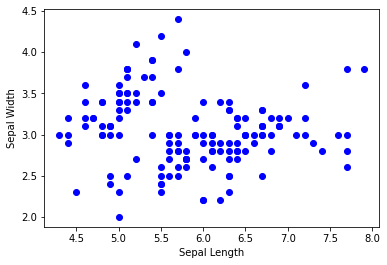

In [18]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

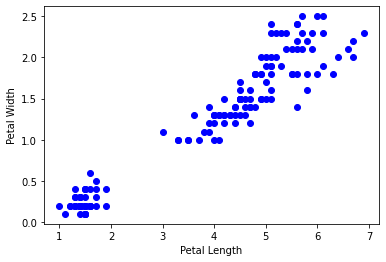

In [19]:
A= iris['PetalLengthCm'].values.reshape(-1,1)
B = iris['PetalWidthCm'].values.reshape(-1,1)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(A,B,color='b')
plt.show()

In [20]:
#Correlation 
corr_mat = iris.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


<AxesSubplot:>

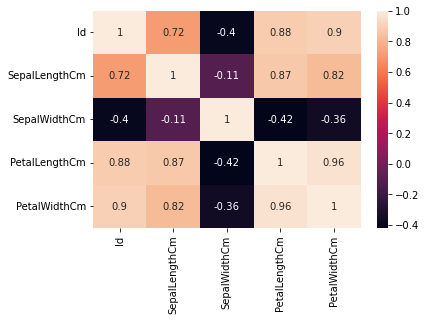

In [21]:
sns.heatmap(iris.corr(), annot=True)

In [22]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [23]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [24]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
8,4.4,2.9,1.4,0.2
55,5.7,2.8,4.5,1.3
90,5.5,2.6,4.4,1.2
104,6.5,3.0,5.8,2.2
84,5.4,3.0,4.5,1.5


In [25]:
test_y.head()

119     Iris-virginica
132     Iris-virginica
64     Iris-versicolor
75     Iris-versicolor
58     Iris-versicolor
Name: Species, dtype: object

In [27]:
#Using LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9736842105263158


C:\Users\Rutuja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [29]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 1.0


In [30]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9736842105263158


In [31]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9210526315789473


In [32]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.947,0.947,0.947,0.947,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree
